In [1]:
import pickle
from qiskit import QuantumCircuit, QuantumRegister
from qiskit_ibm_provider import IBMProvider
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler import PassManager, Layout
from qiskit.transpiler.passes import SetLayout, ApplyLayout, ALAPSchedule, ALAPScheduleAnalysis, BasisTranslator, ASAPSchedule


from models.victim_params import VictimParams


In [2]:
provider = IBMProvider()

# One-way CNOT 3->5 Snoopers: (1, 4, 6)

## Parameters

In [ ]:
snooper_qubits = (1, 4, 6)
victim_qubits = (3, 5)
ancilla_qubits = (0, 2)
victim_circ_uuid = '3a03572b-c786-449e-b9ed-4fea2fb16b54'


In [ ]:
with open('./pickles/full_circs/one_way_cnot_{}_snoopers_{}.p'.format(len(snooper_qubits), victim_circ_uuid), 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    victim_params: VictimParams
    full_qcs, victim_params = pickle.load(f)

In [ ]:
qregs = full_qcs[0].qregs
ancilla = QuantumRegister(2, name='ancilla')

In [ ]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(ancilla, ancilla_qubits):
    layout_dict[qreg] = index

## IBM Nairobi

In [ ]:
ibm_backend_name = 'ibm_nairobi'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
# tqcs[1100].draw('mpl', idle_wires=False)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', 'one_way_cnot_3-5_146', victim_circ_uuid])
print('New job: ', job.job_id())

## IBM Oslo

In [ ]:
ibm_backend_name = 'ibm_oslo'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
# tqcs[1100].draw('mpl', idle_wires=False)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', 'one_way_cnot_3-5_146', victim_circ_uuid])
print('New job: ', job.job_id())

# One-way CNOT 5->3 Snoopers: (1, 4, 6)

## Parameters

In [ ]:
snooper_qubits = (1, 4, 6)
victim_qubits = (5, 3)
ancilla_qubits = (0, 2)
victim_circ_uuid = '3a03572b-c786-449e-b9ed-4fea2fb16b54'


In [ ]:
with open('./pickles/full_circs/one_way_cnot_{}_snoopers_{}.p'.format(len(snooper_qubits), victim_circ_uuid), 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    victim_params: VictimParams
    full_qcs, victim_params = pickle.load(f)

In [ ]:
qregs = full_qcs[0].qregs
ancilla = QuantumRegister(2, name='ancilla')

In [ ]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(ancilla, ancilla_qubits):
    layout_dict[qreg] = index

## IBM Nairobi

In [ ]:
ibm_backend_name = 'ibm_nairobi'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
# tqcs[1100].draw('mpl', idle_wires=False)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', 'one_way_cnot_5-3_146', victim_circ_uuid])
print('New job: ', job.job_id())

## IBM Oslo

In [ ]:
ibm_backend_name = 'ibm_oslo'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
# tqcs[1100].draw('mpl', idle_wires=False)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', 'one_way_cnot_5-3_146', victim_circ_uuid])
print('New job: ', job.job_id())

# Two-way CNOT 3, 5 Snoopers: (1, 4, 6)

## Parameters

In [ ]:
snooper_qubits = (1, 4, 6)
victim_qubits = (3, 5)
ancilla_qubits = (0, 2)
victim_circ_uuid = 'f6bcf9c3-a057-4f9b-acf7-8d804262a33c'


In [ ]:
with open('./pickles/full_circs/two_way_cnot_{}_snoopers_{}.p'.format(len(snooper_qubits), victim_circ_uuid), 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    victim_params: VictimParams
    full_qcs, victim_params = pickle.load(f)

In [ ]:
qregs = full_qcs[0].qregs
ancilla = QuantumRegister(2, name='ancilla')

In [ ]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(ancilla, ancilla_qubits):
    layout_dict[qreg] = index

## IBM Nairobi

In [ ]:
ibm_backend_name = 'ibm_nairobi'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', 'two_way_cnot_35_146', victim_circ_uuid])
print('New job: ', job.job_id())

# Bigger Victim - 4 qubits chain with depth 1 IBM Guadalupe

## Parameters

In [1]:
victim_qubits = (5, 8, 11, 14)
snooper_qubits_1 = (3, 9, 13)
snooper_qubits_2 = (2, 12)
snooper_qubits_3 = (1, 10, 15)
ancilla_qubits = (0, 4, 6, 7)

In [67]:
with open('./pickles/full_circs/four_qubit_chain_d1.p', 'rb') as f:
    random_victim_qcs: list[QuantumCircuit]
    full_qcs = pickle.load(f)

In [68]:
full_qcs[0].qregs

[QuantumRegister(3, 'a1'),
 QuantumRegister(2, 'a2'),
 QuantumRegister(3, 'a3'),
 QuantumRegister(4, 'ancilla'),
 QuantumRegister(4, 'v')]

In [69]:
attack_qregs_1, attack_qregs_2, attack_qregs_3, ancilla, victim_qregs = full_qcs[0].qregs

In [70]:
layout_dict = { }

for at, sn in ((attack_qregs_1, snooper_qubits_1), (attack_qregs_2, snooper_qubits_2), (attack_qregs_3, snooper_qubits_3)):
    for qreg, index in zip(at, sn):
        layout_dict[qreg] = index

for qreg, index in zip(victim_qregs, victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(ancilla, ancilla_qubits):
    layout_dict[qreg] = index

In [71]:
layout_dict

{Qubit(QuantumRegister(3, 'a1'), 0): 3,
 Qubit(QuantumRegister(3, 'a1'), 1): 9,
 Qubit(QuantumRegister(3, 'a1'), 2): 13,
 Qubit(QuantumRegister(2, 'a2'), 0): 2,
 Qubit(QuantumRegister(2, 'a2'), 1): 12,
 Qubit(QuantumRegister(3, 'a3'), 0): 1,
 Qubit(QuantumRegister(3, 'a3'), 1): 10,
 Qubit(QuantumRegister(3, 'a3'), 2): 15,
 Qubit(QuantumRegister(4, 'v'), 0): 5,
 Qubit(QuantumRegister(4, 'v'), 1): 8,
 Qubit(QuantumRegister(4, 'v'), 2): 11,
 Qubit(QuantumRegister(4, 'v'), 3): 14,
 Qubit(QuantumRegister(4, 'ancilla'), 0): 0,
 Qubit(QuantumRegister(4, 'ancilla'), 1): 4,
 Qubit(QuantumRegister(4, 'ancilla'), 2): 6,
 Qubit(QuantumRegister(4, 'ancilla'), 3): 7}

In [72]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [73]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [74]:
tqcs = pm.run(full_qcs)

In [77]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', '4-chain'])
print('New job: ', job.job_id())

New job:  chkqi4dnopt07g344490


# 4 qubits chain 5, 8, 11, 14 - IBM Guadalupe

In [3]:
no_of_qubits = 16
victim_qubits = (5, 8, 11, 14)
snooper_qubits = (3, 9, 13, 2, 12, 1, 10, 15, 0, 4, 6, 7)
ancilla_qubits = ()

In [4]:
with open('./pickles/full_circs/{}_qubit_machine_{}_qubit_chain_{}_snoopers.p'.format(no_of_qubits, len(victim_qubits), len(snooper_qubits)), 'rb') as f:
    full_qcs_per_reps: dict[int, list[QuantumCircuit]]
    full_qcs_per_reps = pickle.load(f)

In [5]:
qregs = full_qcs_per_reps[0][0].qregs
qregs

[QuantumRegister(12, 'a'),
 QuantumRegister(4, 'v'),
 QuantumRegister(0, 'ancilla')]

In [6]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[2], ancilla_qubits):
    layout_dict[qreg] = index

In [7]:
layout_dict

{Qubit(QuantumRegister(12, 'a'), 0): 3,
 Qubit(QuantumRegister(12, 'a'), 1): 9,
 Qubit(QuantumRegister(12, 'a'), 2): 13,
 Qubit(QuantumRegister(12, 'a'), 3): 2,
 Qubit(QuantumRegister(12, 'a'), 4): 12,
 Qubit(QuantumRegister(12, 'a'), 5): 1,
 Qubit(QuantumRegister(12, 'a'), 6): 10,
 Qubit(QuantumRegister(12, 'a'), 7): 15,
 Qubit(QuantumRegister(12, 'a'), 8): 0,
 Qubit(QuantumRegister(12, 'a'), 9): 4,
 Qubit(QuantumRegister(12, 'a'), 10): 6,
 Qubit(QuantumRegister(12, 'a'), 11): 7,
 Qubit(QuantumRegister(4, 'v'), 0): 5,
 Qubit(QuantumRegister(4, 'v'), 1): 8,
 Qubit(QuantumRegister(4, 'v'), 2): 11,
 Qubit(QuantumRegister(4, 'v'), 3): 14}

In [8]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [9]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

In [10]:
full_qcs = []
for reps, qcs in full_qcs_per_reps.items():
    full_qcs.extend(qcs)

In [11]:
tqcs = pm.run(full_qcs)

In [12]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', '4_chain_5_8_11_14'])
print('New job: ', job.job_id())

New job:  chv8s2mnfq8rvo0ltjjg


# 4 qubits chain (5, 8, 11, 14) with 0135 fixed time window - 16 qubit machine (Guadalupe)

In [3]:
no_of_qubits = 16
victim_qubits = (5, 8, 11, 14)
snooper_qubits = (3, 9, 13, 2, 12, 1, 10, 15, 0, 4, 6, 7)
ancilla_qubits = ()
attacker_snooping_window_duration = 2e-06
duration_unit = 's'

In [4]:
with open('./pickles/full_circs/gudalupe_4_qubit_chain_12_snoopers_window_{}{}.p'.format(
    attacker_snooping_window_duration, duration_unit), 'rb') as f:
    full_qcs_per_reps: dict[int, list[QuantumCircuit]]
    full_qcs_per_reps = pickle.load(f)

In [5]:
qregs = full_qcs_per_reps[0][0].qregs
qregs

[QuantumRegister(12, 'a'),
 QuantumRegister(4, 'v'),
 QuantumRegister(0, 'ancilla')]

In [6]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[2], ancilla_qubits):
    layout_dict[qreg] = index

In [7]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [8]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

pm.scheduling = PassManager([
    ALAPSchedule(backend.instruction_durations)
])

In [9]:
full_qcs = []
for reps, qcs in full_qcs_per_reps.items():
    full_qcs.extend(qcs)

### timeline diagram

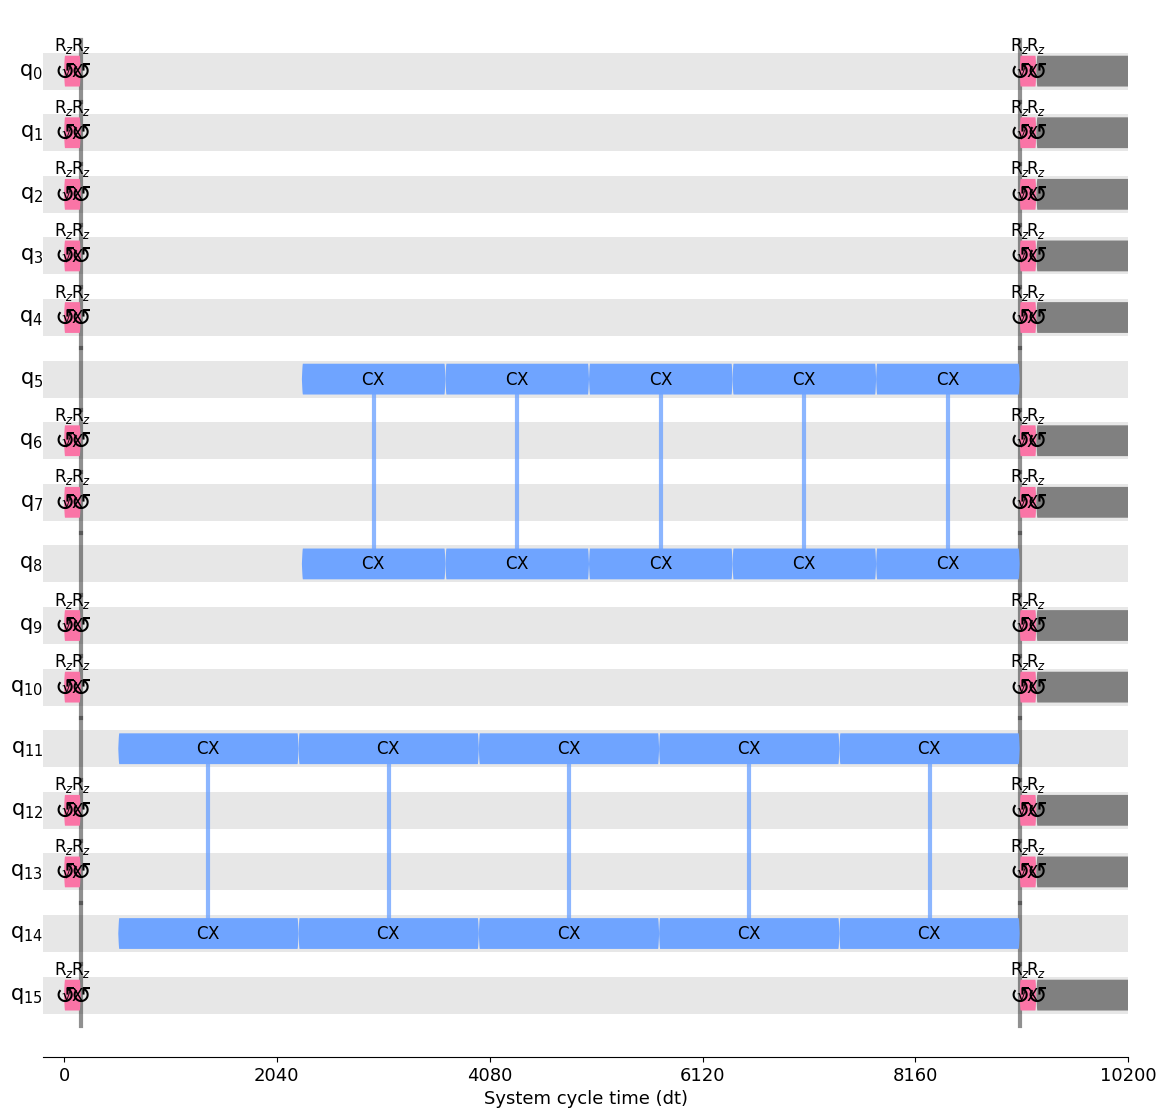

In [10]:
from qiskit.visualization import timeline_drawer

i = -1
tqc = pm.run(full_qcs[i])
# display(tqc.draw('mpl'))
display(timeline_drawer(tqc, time_range=(0, 10000)))

## Run on Guadalupe

In [11]:
tqcs = pm.run(full_qcs)

In [12]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', '4_chain_5_8_11_14_window'])
print('New job: ', job.job_id())

New job:  ci0n5mpcinbchsgdk4v0


# 4 qubits chain (5, 8, 11, 14) with 0135 fixed time window - 16 qubit machine (Guadalupe) - ASAP Scheduling

In [12]:
no_of_qubits = 16
victim_qubits = (5, 8, 11, 14)
snooper_qubits = (3, 9, 13, 2, 12, 1, 10, 15, 0, 4, 6, 7)
ancilla_qubits = ()
attacker_snooping_window_duration = 2e-06
duration_unit = 's'

In [13]:
with open('./pickles/full_circs/gudalupe_4_qubit_chain_12_snoopers_window_{}{}.p'.format(
    attacker_snooping_window_duration, duration_unit
), 'rb') as f:
    full_qcs_per_reps: dict[int, list[QuantumCircuit]]
    full_qcs_per_reps = pickle.load(f)

In [14]:
qregs = full_qcs_per_reps[0][0].qregs
qregs

[QuantumRegister(12, 'a'),
 QuantumRegister(4, 'v'),
 QuantumRegister(0, 'ancilla')]

In [15]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[2], ancilla_qubits):
    layout_dict[qreg] = index

In [16]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [17]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

pm.scheduling = PassManager([
    ASAPSchedule(backend.instruction_durations)
])

In [18]:
full_qcs = []
for reps, qcs in full_qcs_per_reps.items():
    full_qcs.extend(qcs)

### timeline diagram

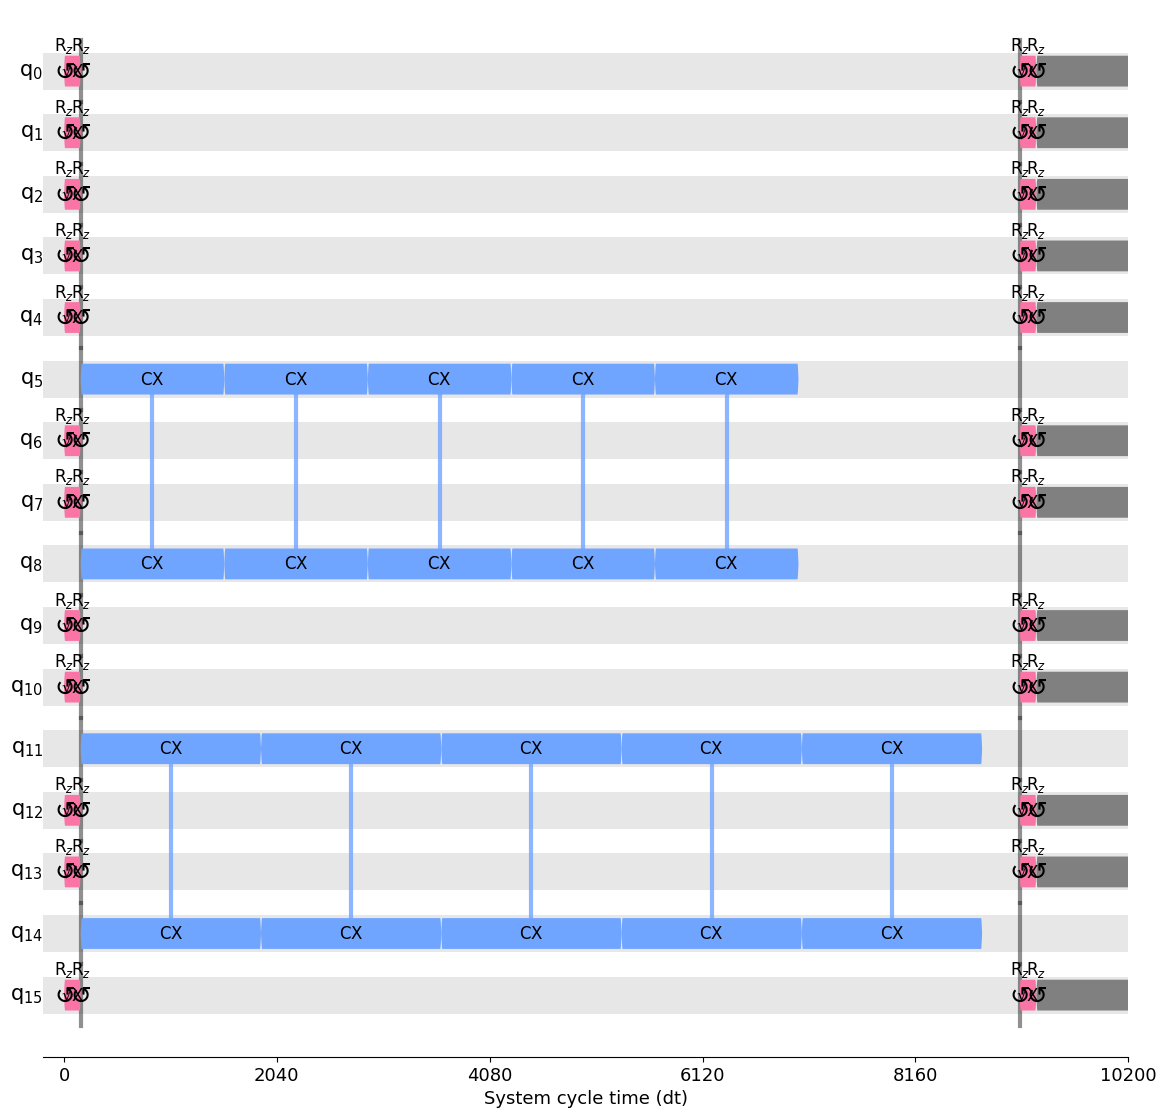

In [19]:
from qiskit.visualization import timeline_drawer

i = -1
tqc = pm.run(full_qcs[i])
# display(tqc.draw('mpl'))
display(timeline_drawer(tqc, time_range=(0, 10000)))

## Run on Guadalupe

In [20]:
tqcs = pm.run(full_qcs)

In [21]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', '4_chain_5_8_11_14_window'])
print('New job: ', job.job_id())

New job:  ci0n8sqlnlj7ii8rhpi0


# 4 qubits chain (5, 8, 11, 14) with 013 fixed time window - 16 qubit machine (Guadalupe)

In [ ]:
no_of_qubits = 16
victim_qubits = (5, 8, 11, 14)
snooper_qubits = (3, 9, 13, 2, 12, 1, 10, 15, 0, 4, 6, 7)
ancilla_qubits = ()

In [ ]:
with open('./pickles/full_circs/gudalupe_4_qubit_chain_12_snoopers_window_2e-06.p', 'rb') as f:
    full_qcs_per_reps: dict[int, list[QuantumCircuit]]
    full_qcs_per_reps = pickle.load(f)

In [ ]:
qregs = full_qcs_per_reps[0][0].qregs
qregs

[QuantumRegister(12, 'a'),
 QuantumRegister(4, 'v'),
 QuantumRegister(0, 'ancilla')]

In [ ]:
layout_dict = { }

for qreg, index in zip(qregs[0], snooper_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[1], victim_qubits):
    layout_dict[qreg] = index

for qreg, index in zip(qregs[2], ancilla_qubits):
    layout_dict[qreg] = index

In [ ]:
ibm_backend_name = 'ibmq_guadalupe'
backend = provider.get_backend(ibm_backend_name)

In [ ]:
pm = generate_preset_pass_manager(0, backend)
layout = Layout(layout_dict)
pm.layout = PassManager([
    SetLayout(layout),
    ApplyLayout()
])

pm.scheduling = PassManager([
    ALAPSchedule(backend.instruction_durations)
])

In [ ]:
full_qcs = []
for reps, qcs in full_qcs_per_reps.items():
    full_qcs.extend(qcs)

### timeline diagram

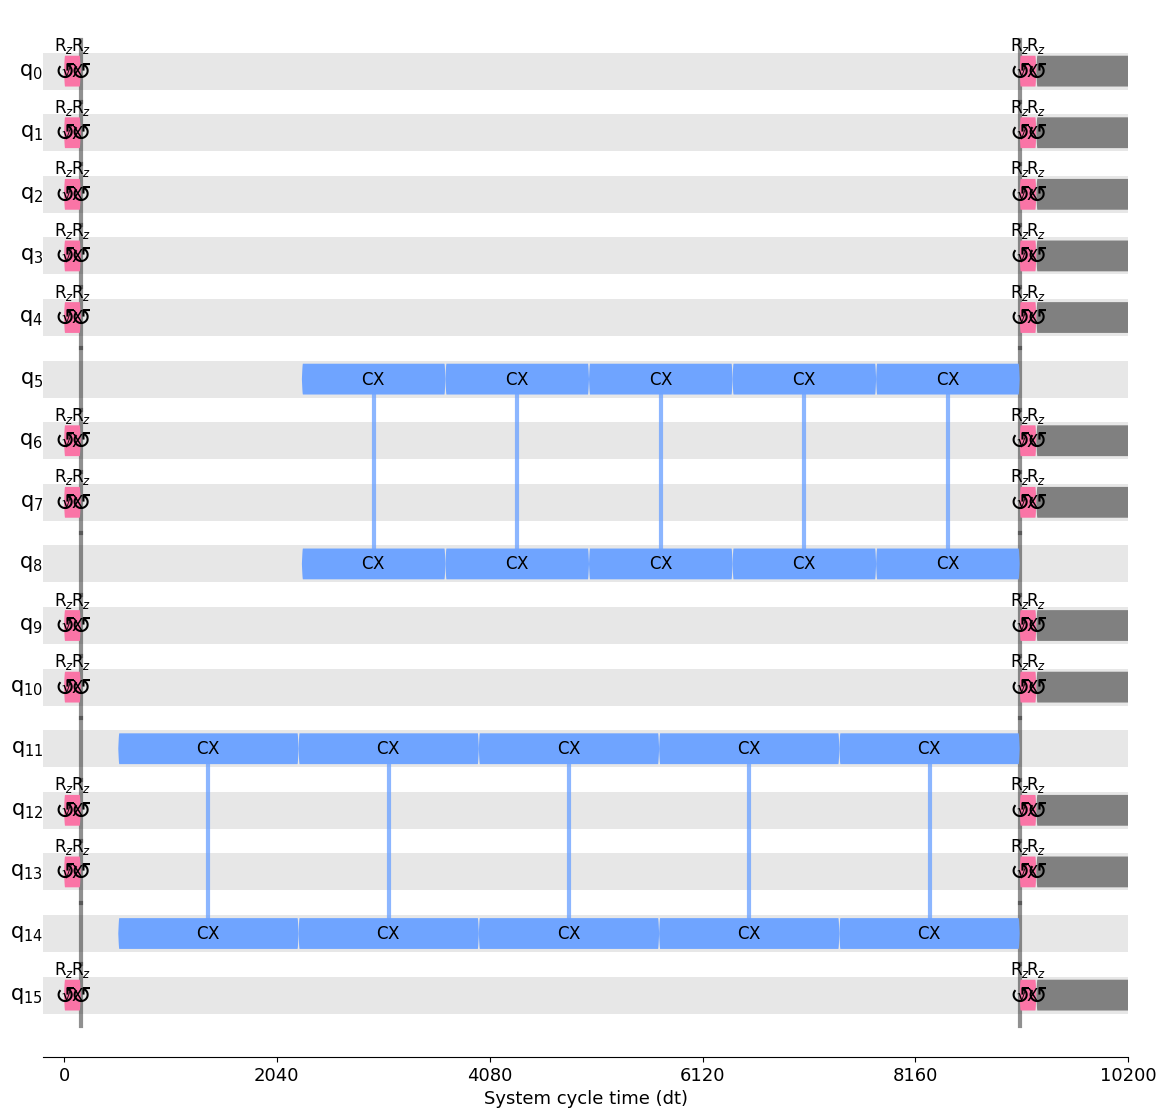

In [ ]:
from qiskit.visualization import timeline_drawer

i = -1
tqc = pm.run(full_qcs[i])
# display(tqc.draw('mpl'))
display(timeline_drawer(tqc, time_range=(0, 10000)))

## Run on Guadalupe

In [ ]:
tqcs = pm.run(full_qcs)

In [ ]:
job = backend.run(tqcs, shots=8000)
job.update_tags(['snooping', '4_chain_5_8_11_14_window'])
print('New job: ', job.job_id())

New job:  ci0clm9cinbchsg3mdm0
